# IBM Coursera Advanced Data Science - CAPSTONE PROJECT

## Project Title: Spotify Songs Analysis

In this project, I have used the [19,000 Spotify Songs](https://www.kaggle.com/edalrami/19000-spotify-songs) dataset available on [Kaggle](https://www.kaggle.com/). The aim of this project work is to perform all the neccessary steps(ETL, EDA, Feature Engineering, Model Training, Evaluation, etc) in order to understand the dataset and also perform necessary processing in order to prepare the dataset for training on ML models so that one can predict popularity of various songs present in the dataset.


In [1]:
#Importing the Required libraries

import numpy as np # For linear algebra
import pandas as pd # For data processing, CSV file I/O (reading the csv data files)
import matplotlib.pyplot as plt #For data Visualisation
import seaborn as sns

## Data Preparation

In [2]:
#loading the data

spotify_song_data= pd.read_csv("C:/Users/bdube/Downloads/song_data.csv") #Song_data file
spotify_song_info= pd.read_csv("C:/Users/bdube/Downloads/song_info.csv") #Song_info file

In [3]:
song_info=spotify_song_info.copy()
song_data=spotify_song_data.copy()

In [4]:
song_data.head() #returns the top-5 rows 

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


### Feature Explanations

#### The Dataset contains 19,000 songs and has 15 features which are described below:


- song_name: The name of the song.

- song_popularity: The Song ratings of spotify audience.

- song_duration_ms: The duration of the track in milliseconds.
  
- acousticness: A confidence measure(ranging from 0.0 to 1.0) of whether the track is acoustic (1.0 -> high confidence the track is acoustic).

- danceability: Danceability means how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity (0.0 -> least danceable and 1.0 -> most danceable).

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

- instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live (A value above 0.8 provides strong likelihood that the track is live).

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.(If no key was detected, the value is -1).

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- loudness: The overall loudness of a track in decibels (dB) which are averaged across the entire track and are useful for comparing relative loudness of tracks.

- audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived (Major -> 1 and minor -> 0).

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

- tempo: The overall estimated tempo of a track in beats per minute (BPM).

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive while tracks with low valence sound more negative.


In [5]:
song_data.shape

(18835, 15)

## Data Cleaning

In [6]:
#Let's have a look at null values in dataset

song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [7]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## EDA: Exploratory Data Analysis

In [8]:
song_data.info() # provides a concise summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [9]:
#Casting pandas object to a specified dtype (Type conversion) 

song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [10]:
song_data.describe() #gives statistical details (like percentile, mean, std etc.) of data frame 

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


- Now, let's Check the popularity rating of songs. Take the mean value of them (52.99). This value serves as a threshold value and if the song_popularity is higher than 52.99, we labeled it "1" and if is not we labeled it "0". Therefore, we have "1" for the popular songs and "0" for the unpopular ones.

In [11]:
song_data["popularity"]= [ 1 if i>=52.99 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

1    10516
0     8319
Name: popularity, dtype: int64

In [12]:
#popular songs' data

a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,10516.000000,1.051600e+04,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.0
mean,68.579213,2.184250e+05,0.241322,0.642195,0.648403,0.053090,5.263884,0.174446,-7.126728,0.632560,0.102008,120.596589,3.966432,0.518573,1.0
std,10.846015,5.378093e+04,0.276651,0.153254,0.208881,0.185288,3.644011,0.139164,3.743718,0.482131,0.101449,28.307483,0.278770,0.238299,0.0
min,53.000000,5.001400e+04,0.000004,0.061700,0.001070,0.000000,0.000000,0.019600,-36.281000,0.000000,0.022400,46.591000,0.000000,0.027700,1.0
25%,60.000000,1.879018e+05,0.025100,0.543000,0.523000,0.000000,2.000000,0.092300,-8.466250,0.000000,0.038000,98.056000,4.000000,0.329000,1.0
50%,67.000000,2.119600e+05,0.125000,0.652000,0.678000,0.000004,5.000000,0.119000,-6.269000,1.000000,0.055850,119.973000,4.000000,0.512000,1.0
75%,75.000000,2.421860e+05,0.371000,0.754000,0.810000,0.000763,8.000000,0.208000,-4.749000,1.000000,0.120000,139.020750,4.000000,0.704000,1.0
max,100.000000,1.355938e+06,0.996000,0.980000,0.997000,0.997000,11.000000,0.981000,1.585000,1.000000,0.869000,216.115000,5.000000,0.984000,1.0


In [13]:
song_data.corr() #provides the pairwise correlation of all columns in the dataframe

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.800050
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.004006
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.067048
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.063472
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.017901
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.126434
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.007874
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.040638
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.094201
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,0.010284


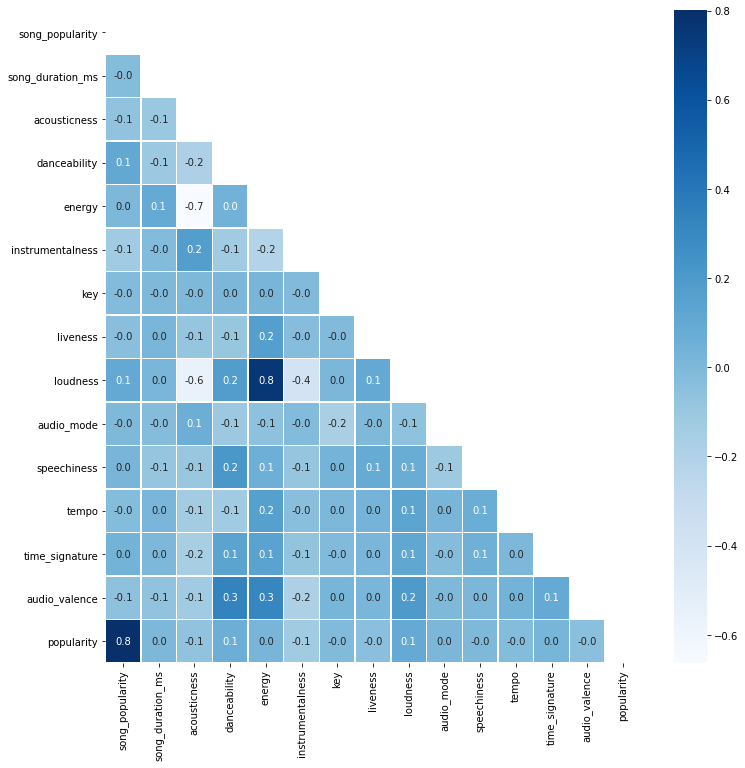

In [14]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

#### The above plot for correlation tells that:
- Correlation between loudness and energy is 0.8 (strong)
- All the other correlations are quite low. 
- When correlation between song_popularity and all other features is compared, there are no signs of a strong correlation (a linear relationship) that gives us a clear information about popularity. 
- danceability and loudness seems to have correlation with popularity feature(0.10).

## Categorical Analysis

In [15]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize the plots
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="yellow")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


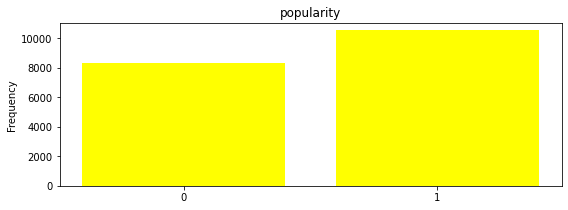

popularity:
1    10516
0     8319
Name: popularity, dtype: int64


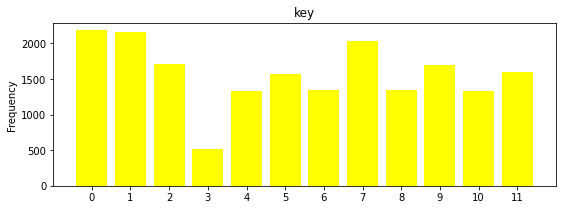

key:
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


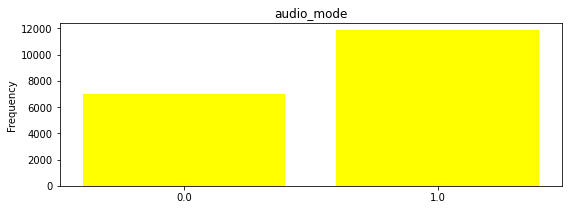

audio_mode:
1.0    11831
0.0     7004
Name: audio_mode, dtype: int64


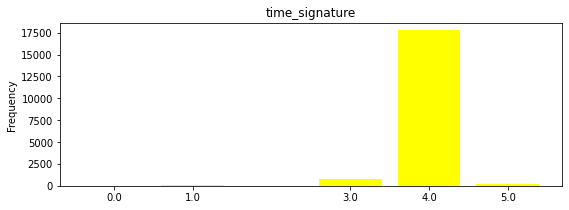

time_signature:
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64


In [16]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

In [17]:
#key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1,0.602588
6,6,0.598816
11,11,0.586875
10,10,0.565740
0,0,0.562786
5,5,0.557814
8,8,0.549296
2,2,0.539359
4,4,0.535795
9,9,0.527091


In [18]:
#audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,audio_mode,popularity
1,1.0,0.562252
0,0.0,0.551685


In [19]:
#time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
3,4.0,0.561789
4,5.0,0.557940
2,3.0,0.488342
1,1.0,0.465753
0,0.0,0.333333


## Outlier detection

In [20]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25) #First quartile
        Q3 = np.percentile(df[c],75) #Third quartile
        IQR = Q3 - Q1 #Inter-quartile range(IQR)
        outlier_step = IQR * 1.5 # Outlier step
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #detect outlier
        outlier_indices.extend(outlier_list_col) #store the indeces
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [21]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,1
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [22]:
#drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [23]:
song_data[song_data["audio_mode"].isnull()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity


C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


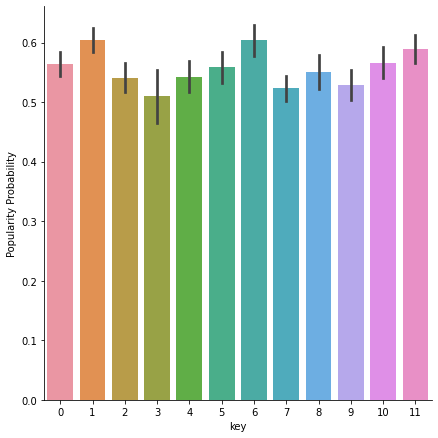

In [24]:
#Plot for Key vs Popularity

g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


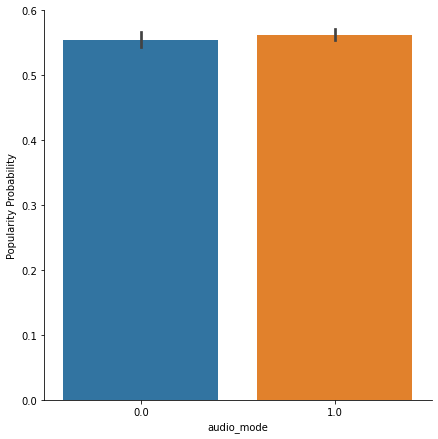

In [25]:
#Plot for audio_mode vs Popularity

g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


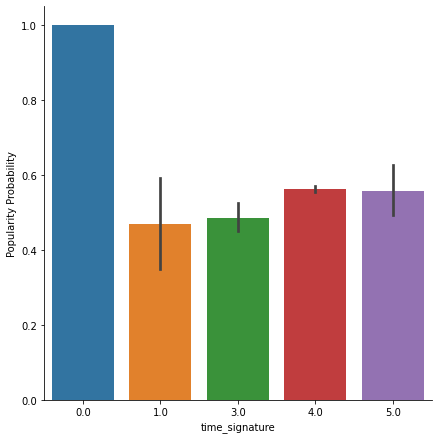

In [26]:
#Plot for time_signature vs Popularity

g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


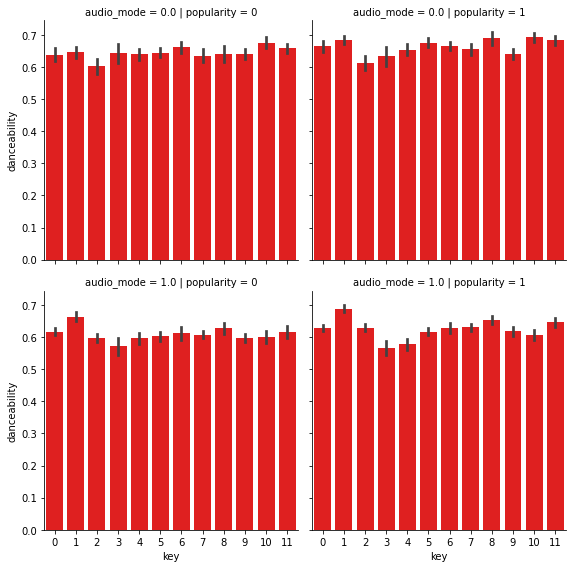

In [27]:
#Based on danceability

g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="Red")
g.add_legend()
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


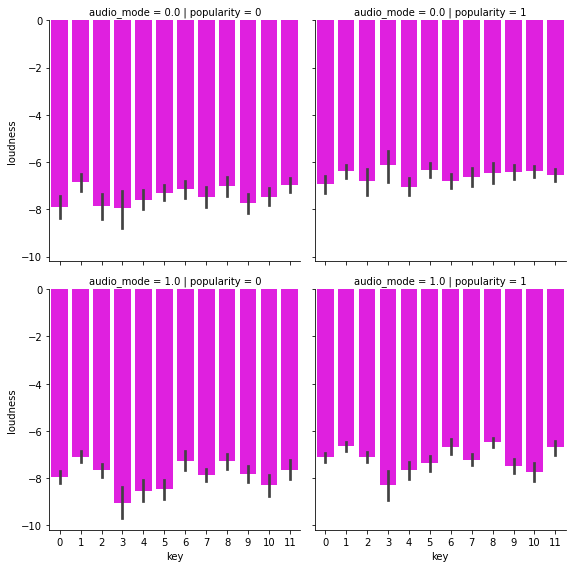

In [28]:
#Based on loudness

g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="magenta")
g.add_legend()
plt.show()

## Features Distribution

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

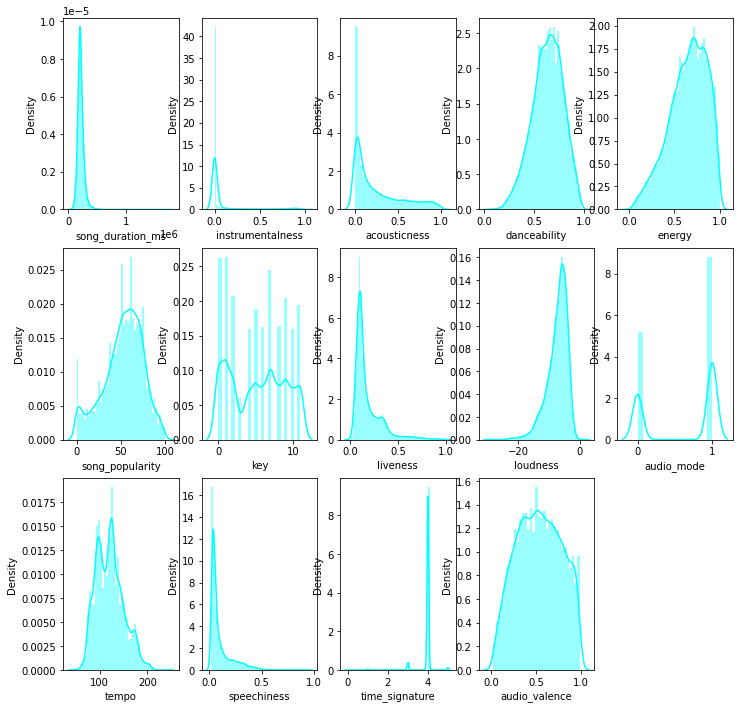

In [29]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_popularity"] , color="aqua", ax=axes[1, 0])
sns.distplot( song_data["song_duration_ms"] , color="aqua", ax=axes[0, 0])
sns.distplot( song_data["acousticness"] , color="aqua", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="aqua", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="aqua", ax=axes[0, 4])
sns.distplot( song_data["instrumentalness"] , color="aqua", ax=axes[0, 1])
sns.distplot( song_data["key"] , color="aqua", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="aqua", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="aqua", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="aqua", ax=axes[1, 4])
sns.distplot( song_data["speechiness"] , color="aqua", ax=axes[2, 1])
sns.distplot( song_data["tempo"] , color="aqua", ax=axes[2, 0])
sns.distplot( song_data["time_signature"] , color="aqua", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="aqua", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


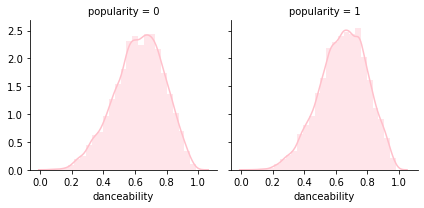

In [32]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25, color="pink")
plt.show()

C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


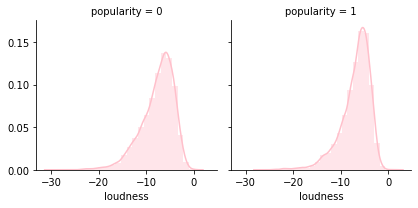

In [33]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25, color="pink")
plt.show()

## Feature Engineering

In [37]:
#Specifying threshold value based on the mean value of popularity of songs

spotify_song_data["popularity"]= [ 1 if i>=52.99 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

1    10516
0     8319
Name: popularity, dtype: int64

In [38]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,1,In The End
2,1,Seven Nation Army
3,1,By The Way
4,1,How You Remind Me


# Implementing ML Models

In [39]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [40]:
song_data.columns[song_data.isnull().any()] #Check for null values

Index([], dtype='object')

In [41]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [42]:
song_data.columns[song_data.isnull().any()] #Check for null values

Index([], dtype='object')

In [43]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [44]:
#data preparation

y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)


#Normalization

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (13, 14808)
x_test:  (13, 3702)
y_train:  (14808,)
y_test:  (3702,)


### Logistic Regression 

As our aim is to predict whether a song belongs to popular(1) or unpopular(0) category, Logistic Regression will be useful for the prediction of categorical variables. Since it is a probability value, we will get a value between [0,1] using the sigmoid function in this case of binary classification.

In [45]:
#parameter initialization

def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b



#sigmoid function

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [46]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [47]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [48]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.690381
Cost after iteration 10: 0.689499
Cost after iteration 20: 0.688775
Cost after iteration 30: 0.688180
Cost after iteration 40: 0.687690
Cost after iteration 50: 0.687285
Cost after iteration 60: 0.686948
Cost after iteration 70: 0.686668
Cost after iteration 80: 0.686433
Cost after iteration 90: 0.686234
Cost after iteration 100: 0.686066
Cost after iteration 110: 0.685921
Cost after iteration 120: 0.685797
Cost after iteration 130: 0.685689
Cost after iteration 140: 0.685593
Cost after iteration 150: 0.685508
Cost after iteration 160: 0.685432
Cost after iteration 170: 0.685363
Cost after iteration 180: 0.685300
Cost after iteration 190: 0.685242


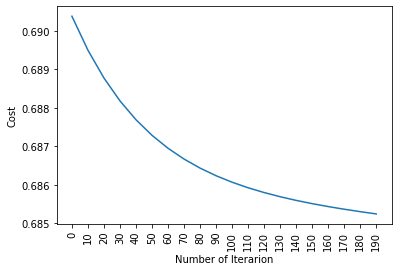

train accuracy: 56.050783360345754 %
test accuracy: 55.67260940032415 %


In [49]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

### ROC Curve with Logistic Regression

In [51]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

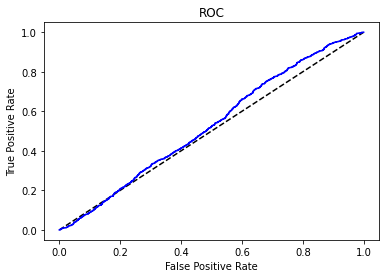

In [53]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plotting the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="blue")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.56043214 0.56043214 0.56043214 0.56043214 0.56043214 0.56043214
 0.56043214 0.56043214 0.56081081 0.56081081]
Cross_val scores average:  0.560507874518678


In [55]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

C:\Users\bdube\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bdube\Anaconda3\lib\site-packages\

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.5605078336034576


In [56]:
Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

### KNN

In [57]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0 ... 1 1 1]


In [58]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.9950027012425716
With KNN (K=3) test accuracy is:  0.653160453808752


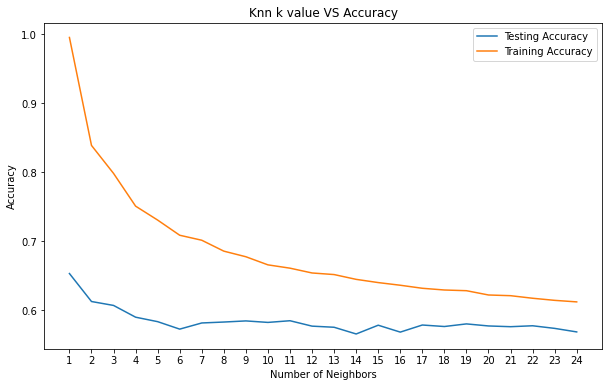

Best accuracy is 0.653160453808752 with K = 1


In [60]:
#Finding the 'k' value

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [61]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.54287643 0.541526   0.55435517 0.57596219 0.56313302 0.54355165
 0.55232951 0.5381499  0.57432432 0.53310811]
Cross_val scores average:  0.5519316294687666


In [62]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best accuracy: 0.6272825499729876


In [63]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

### SVM (Support Vector Machine)

In [64]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.5623311723392761
Test accuracy of svm algo: 0.5591572123176661


In [65]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.56178258 0.56313302 0.56380824 0.5624578  0.56515868 0.55773126
 0.56448346 0.56313302 0.56283784 0.55945946]
Cross_val scores average:  0.5623985345913098


In [66]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

# Conclusion

In [67]:
#Comparison Of Performance

model_performances=pd.DataFrame({'Model':['SVM','K-NearestNeighbors','LogisticRegession'],
                                 'Accuracy':[SVM_score,KKN_Score,Logistic_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
1,K-NearestNeighbors,0.653160
2,LogisticRegession,0.560508
0,SVM,0.559157


- Hence, out of the all applied ML algorithms K-Nearest Neighbors(KNN) gave the best results for predicting popularity (Popular/Unpopular) of a song with an accuracy of 65.31%. 